# plot a simplified version of the CC-elastic cross section
from eq:CCelasticXsec of my note HowToExtractTheAxialMass

In [542]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
import sympy as sp
from plot_tools import *
from matplotlib.ticker import NullFormatter
%matplotlib inline
# %matplotlib notebook

In [590]:
figures_path='/Users/erezcohen/Desktop/Projects/uBoone/write-ups/HowToExtractTheAxialMass/Figures/CrossSection/'

## units

In [581]:
Q2 = np.linspace( 0.0 , 10 , 100 )
Q2label = '$Q^2$ (GeV/c)$^2$'

In [512]:
GeV = 1.

## constants

In [348]:
M = 0.939 * GeV
m = 0.1056 * GeV
m_W = 80.42 * GeV # +/- 0.06
g_A = 1.267 # +/- 0.004
cos_theta_C = 0.9755 # +/- 0.004
G_F = 1.1663787 * GeV**-2 # +/- 0.0000006
mu_p = 2.7928474 # proton dipole moment
mu_n = -1.913 # neutron dipole moment

In [387]:
M_A = 1.03

## Bradford parametrization of the vector form factors of the neutron

In [388]:
M2 = M * M
m2 = m * m
def tau( Q2 = 0.0 ):
    return (Q2 / (4.*M2))

In [389]:
def G_d( Q2 = 0.0 , Lambda2 = 0.71 ):    
    return np.power((1. + Q2/Lambda2),-2)

def G_A_dipole( Q2 = 0.0 ):    
    return np.power((1. + Q2/np.square(M_A)),-2)

In [390]:
def G_E_n_Bradford( Q2 = 0.0 ):
    
    a = np.array([0 , 1.25 , 1.30 ])
    a_err = np.array([0 , 0.368 , 1.99 ])
    
    b = np.array([ 0 , -9.86 , 305 , -758 , 802])
    b_err = np.array([ 0 , 6.46 , 28.6 , 77.5 , 156])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1)) + a[2]*(np.power(tau(Q2),2))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3)) + b[4]*(np.power(tau(Q2),4))


    return (numerator/denominator)

In [391]:
def G_E_p_Bradford( Q2 = 0.0 ):
    
    a = np.array([1. , -0.0578 ])
    a_err = np.array([0 , 0.166 ])
    
    b = np.array([ 0 , 11.1 , 13.6 , 33.0])
    b_err = np.array([ 0 , 0.217 , 1.39 , 8.95])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return (numerator/denominator)

In [392]:
def G_E_Bradford( Q2 = 0.0 ):
    return 0.5*( G_E_p_Bradford(Q2) - G_E_n_Bradford(Q2) )

In [491]:
def G_M_n_Bradford( Q2 = 0.0 ):

    # Bradford gives G_M_n/mu_n in their paper
    a = np.array([ 1 , 1.81 ])
    a_err = np.array([ 0 , 0.402 ])
    
    b = np.array([ 0 , 14.1 , 20.7 , 68.7])
    b_err = np.array([ 0 , 0.597 , 2.55 , 14.1])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_n*(numerator/denominator)

In [492]:
def G_M_p_Bradford( Q2 = 0.0 ):
    a = np.array([ 1 , 0.150 ])
    a_err = np.array([ 0 , 0.0312 ])
    
    b = np.array([ 0 , 11.1 , 19.6 , 7.54])
    b_err = np.array([ 0 , 0.103 , 0.281 , 0.967])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_p*(numerator/denominator)

In [513]:
def G_M_Bradford( Q2 = 0.0 ):
    return 0.5*( G_M_p_Bradford(Q2) - G_M_n_Bradford(Q2) )

In [514]:
def F1_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_p_Bradford(Q2) + G_E_p_Bradford(Q2) )
def F2_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_p_Bradford(Q2) - G_E_p_Bradford(Q2) )
def F1_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_n_Bradford(Q2) + G_E_n_Bradford(Q2) )
def F2_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_n_Bradford(Q2) - G_E_n_Bradford(Q2) )

In [515]:
def F1V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_Bradford(Q2) + G_E_Bradford(Q2) )
def F2V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_Bradford(Q2) - G_E_Bradford(Q2) )

In [516]:
def G_E_p_Bernauer( Q2 = 0.0 ):
    a = np.array([ 1.0 , -3.3686, 14.5606 , -88.1912 
                  , 453.6244 , -1638.7911 , 3980.7174 
                  , -6312.6333 , 6222.3646 , -3443.2251 
                  , 814.4112 ])
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3) + a[4]*np.power(Q2,4) + a[5]*np.power(Q2,5)
def G_M_p_Bernauer( Q2 = 0.0 ):
    a = np.array([1.0 ,-2.5952 , 1.0222 , 23.4945, -93.0372
                  ,140.7984, -0.3656 , -305.6759 , 444.6251 
                  , -273.6688 , 64.5811 ])
    a = np.array([ 1.0 ,-2.5952])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3)
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])

# Plot form-factors as a function of Q2 

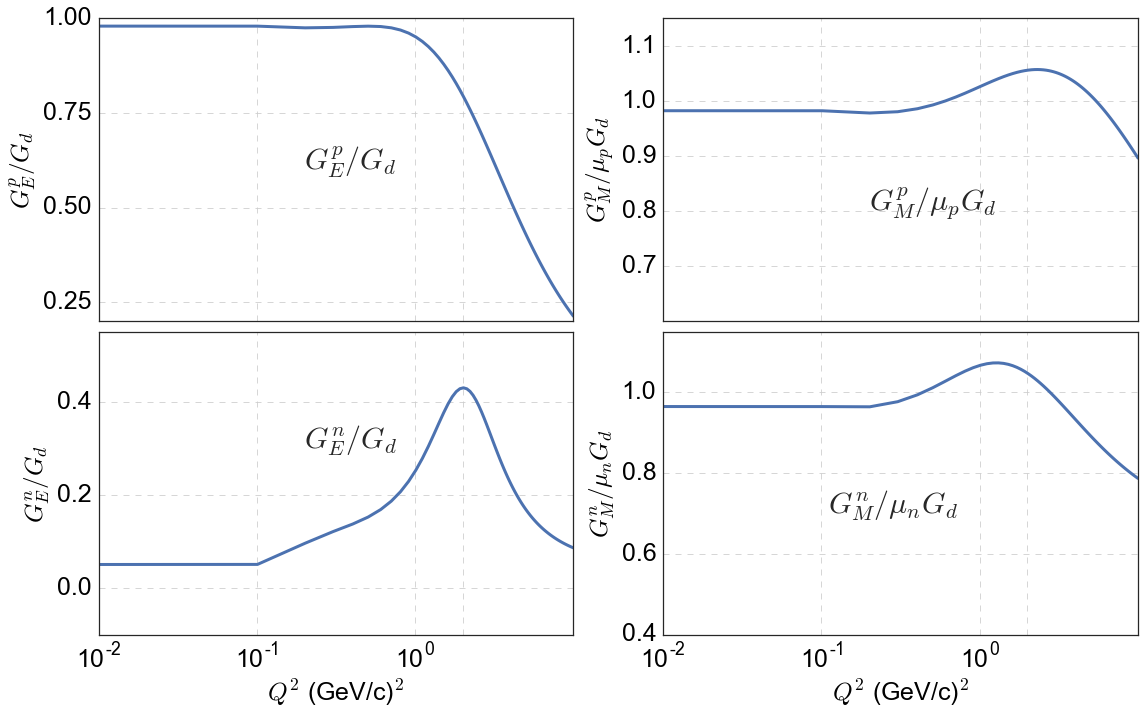

In [592]:
# Figure 1 in Kelly' paper PRC.70.068202 and figure 2 in Bradford' paper

fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(2,2,1)
plt.plot( Q2 , G_E_p_Bradford(Q2)/G_d(Q2) ,linewidth=3 ) 
ax.set_xscale('log')
ylabel='$ G_E^p / G_{d} $'
set_axes(ax,'',ylabel,do_add_grid=True,xticks=[0.01,0.1,1,2],yticks=[0.25,0.5,0.75,1.0])
plt.text(0.2,0.6,ylabel,fontsize=30)
ax.xaxis.set_major_formatter(NullFormatter())

ax=fig.add_subplot(2,2,2)
plt.plot( Q2 , G_M_p_Bradford(Q2)/(mu_p*G_d(Q2)) ,linewidth=3) 
ax.set_xscale('log')
ylabel='$ G_M^p / \\mu_p G_{d} $'
set_axes(ax,'',ylabel,do_add_grid=True,xticks=[0.01,0.1,1,2],yticks=[0.7,0.8,0.9,1.0,1.1])
ax.set_ylim(0.6,1.15)
plt.text(0.2,0.8,ylabel,fontsize=30)
ax.xaxis.set_major_formatter(NullFormatter())


ax=fig.add_subplot(2,2,3)
plt.plot( Q2 , G_E_n_Bradford(Q2)/G_d(Q2) ,linewidth=3) 
ax.set_xscale('log')
ylabel='$ G_E^n / G_{d}$'
set_axes(ax,Q2label,ylabel,do_add_grid=True,xticks=[0.01,0.1,1,2],yticks=[0,0.2,0.4])
plt.text(0.2,0.3,ylabel,fontsize=30)
ax.set_ylim(-0.1,0.55)


ax=fig.add_subplot(2,2,4)
plt.plot( Q2 , G_M_n_Bradford(Q2)/(mu_n*G_d(Q2)) ,linewidth=3 ) 
ax.set_xscale('log')
ylabel='$ G_M^n / \\mu_n G_{d}$'
set_axes(ax,Q2label,ylabel,do_add_grid=True,xticks=[0.01,0.1,1,2],yticks=[0.4,0.6,0.8,1])
plt.text(0.11,0.7,ylabel,fontsize=30)
ax.set_ylim(0.4,1.15)


plt.tight_layout()
plt.savefig(figures_path+'G_E_pn_G_M_pn.pdf')

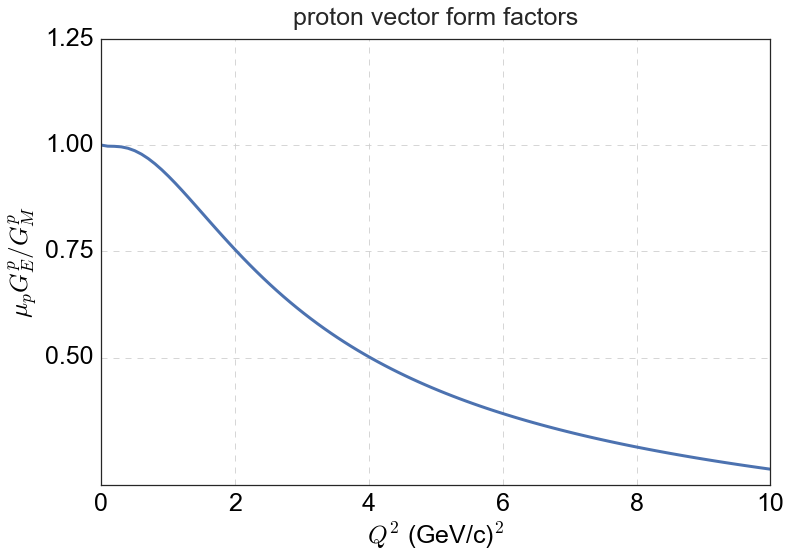

In [593]:
fig,ax=plt.subplots(figsize=(12,8))
plt.plot( Q2 , mu_p*G_E_p_Bradford(Q2)/G_M_p_Bradford(Q2) , linewidth=3) 
set_axes(ax,Q2label,'$\\mu_p G_E^p / G_M^p$',title='proton vector form factors',do_add_grid=True,yticks=[0.5,0.75,1,1.25])
plt.savefig(figures_path+'mu_p_G_E_p_over_G_M_p.pdf')
# compare w/ Figure 2.9 in Tony' book

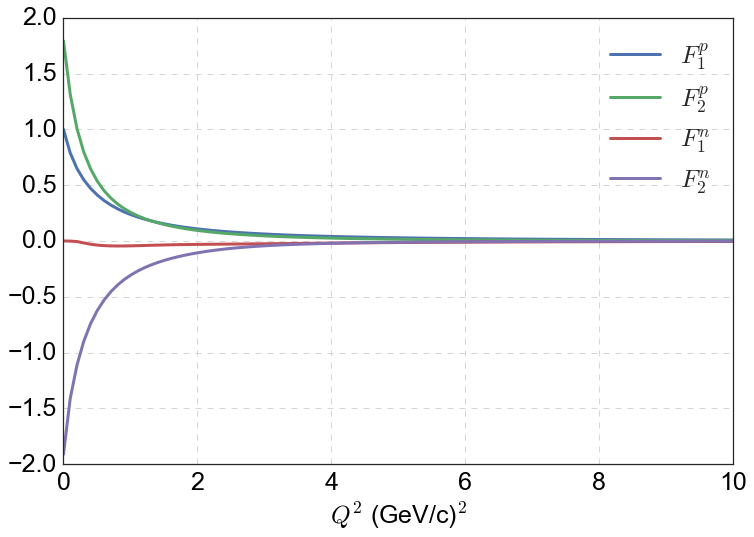

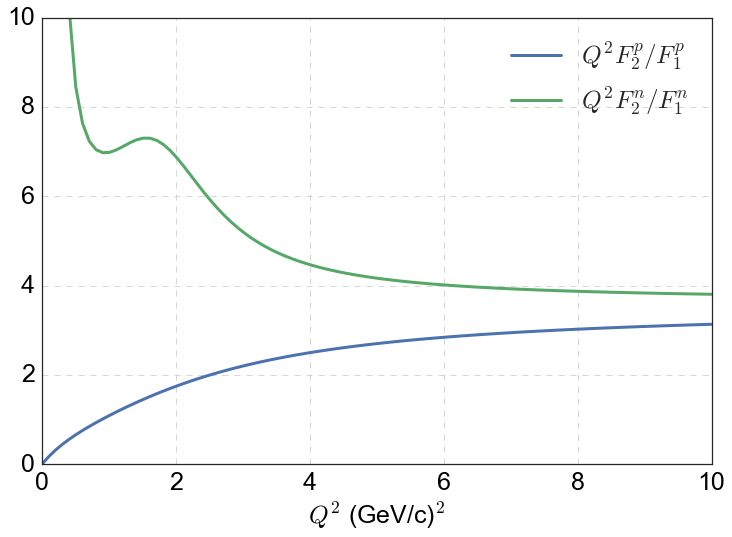

In [594]:
# compare with Figure 6 of Holt/Gilman paper Holt_2012_Rep._Prog._Phys._75_086301
fig,ax=plt.subplots(figsize=(12,8))
plt.plot( Q2 , F1_p_Bradford(Q2) , label='$F_1^p$' , linewidth=3)
plt.plot( Q2 , F2_p_Bradford(Q2) , label='$F_2^p$' , linewidth=3)
plt.plot( Q2 , F1_n_Bradford(Q2) , label='$F_1^n$' , linewidth=3)
plt.plot( Q2 , F2_n_Bradford(Q2) , label='$F_2^n$' , linewidth=3)
plt.legend( loc='upper right', fontsize=25 )
set_axes(ax,Q2label,'',do_add_grid=True)


fig,ax=plt.subplots(figsize=(12,8))
plt.plot( Q2 , Q2*F2_p_Bradford(Q2)/F1_p_Bradford(Q2) , label='$Q^2 F_2^p/F_1^p$', linewidth=3)
plt.plot( Q2 , Q2*F2_n_Bradford(Q2)/F1_n_Bradford(Q2) , label='$Q^2 F_2^n/F_1^n$', linewidth=3)
ax.set_ylim(0,10);

plt.legend( loc='best', fontsize=25 )
set_axes(ax,Q2label,'',do_add_grid=True)
plt.savefig(figures_path+'Q2_F2_Bradford_over_F1_Bradford.pdf')


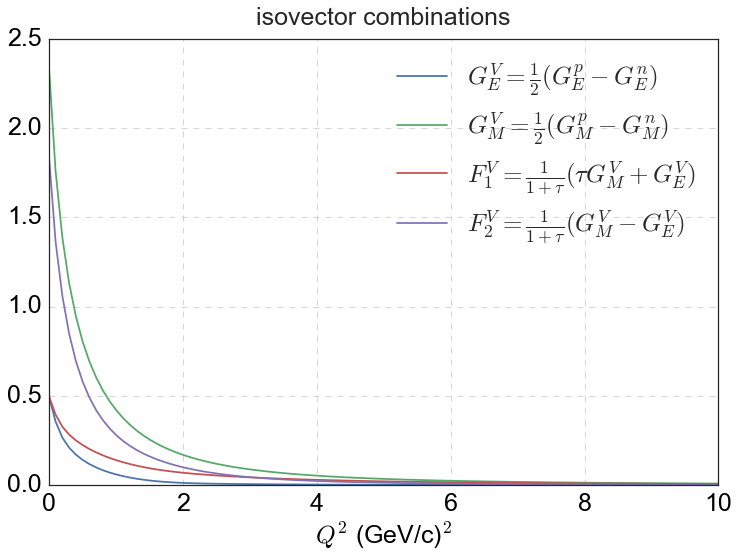

In [521]:
fig,ax=plt.subplots(figsize=(12,8))
plt.plot( Q2 , G_E_Bradford(Q2) , label='$G_E^V=\\frac{1}{2}(G_E^p-G_E^n)$');
plt.plot( Q2 , G_M_Bradford(Q2) , label='$G_M^V=\\frac{1}{2}(G_M^p-G_M^n)$');
plt.plot( Q2 , F1V_Bradford(Q2) , label='$F_1^V=\\frac{1}{1+\\tau}(\\tau G_M^V + G_E^V)$');
plt.plot( Q2 , F2V_Bradford(Q2) , label='$F_2^V=\\frac{1}{1+\\tau}(G_M^V - G_E^V)$');

set_axes(ax,Q2label,title='isovector combinations',do_add_grid=True)
plt.legend( loc='upper right', fontsize=25 ) # bbox_to_anchor=(1,1.05),

# ax.set_yscale('log')

# combination of the form-factors, contribuions to the cross-section

In [522]:
G_F2 = G_F * G_F
cos2_theta_C = cos_theta_C*cos_theta_C
m_W2 = m_W * m_W

# Kinematical Factor
def KinFactor( E=0 , Q2=0.0):
    F = (M2*G_F2*cos2_theta_C)/(8*np.pi)
    #     return ( F/np.square(E) ) * np.square( m_W2/(m_W2+Q2) )  # F is just a Fermi-factor, independent for the experiment
    return ( 1./np.square(E) ) * np.square( m_W2/(m_W2+Q2) ) 


# ξ
def xi( E=0 , Q2=0.0 ):
    return ( (4*M*E - Q2 - m2)/(M2))


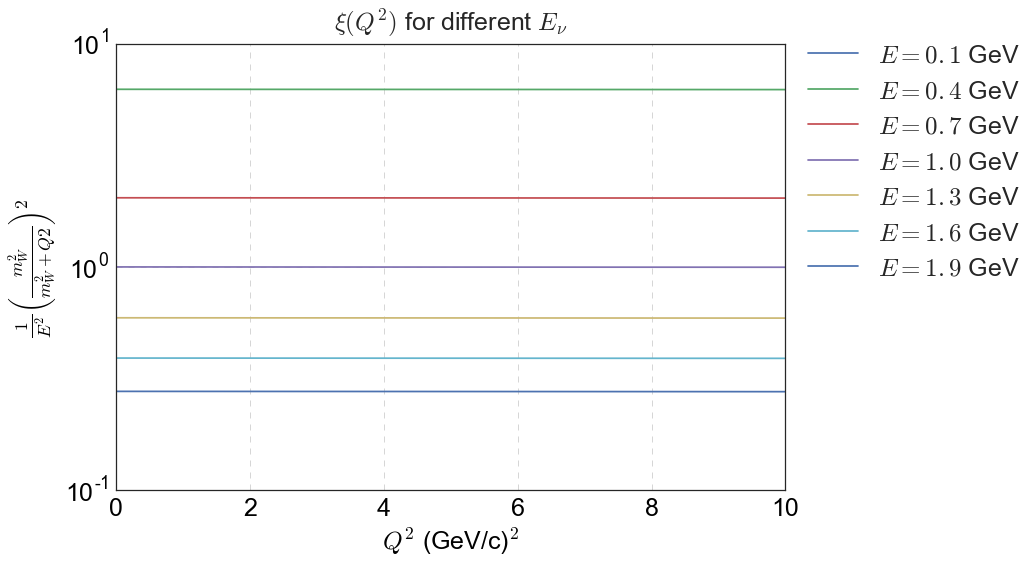

In [523]:
fig,ax=plt.subplots(figsize=(12,8))

for E in np.linspace(0.1,1.9,7):
    plt.plot( Q2 , KinFactor(E=E,Q2=Q2) , label='$E=%.1f$ GeV'%E)

plt.legend( bbox_to_anchor=(1,1.05), loc='best', fontsize=25 )
# set_axes(ax,Q2label,'$\\frac{M^2 G_F^2 \\cos^2 \\theta_C}{8 \\pi E} (\\frac{m_W^2}{m_W^2+Q2})^2$'
set_axes(ax,Q2label,'$\\frac{1}{E^2} \\left(\\frac{m_W^2}{m_W^2+Q2} \\right)^2$'
         ,title='$\\xi (Q^2)$ for different $E_\\nu$',do_add_grid=True)
ax.set_yscale('log')
ax.set_ylim(0.1,10);

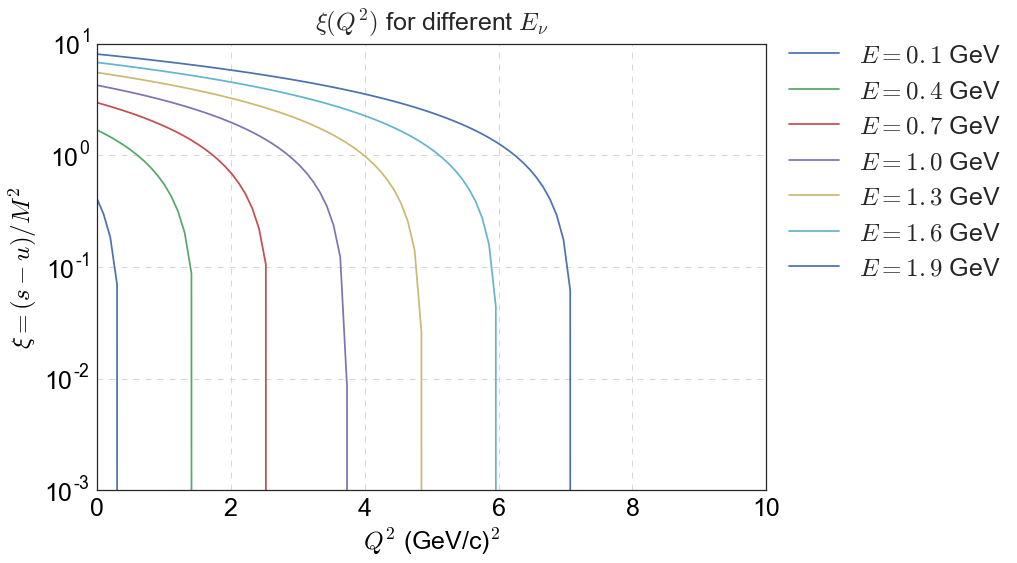

In [524]:
fig,ax=plt.subplots(figsize=(12,8))

for E in np.linspace(0.1,1.9,7):
    plt.plot( Q2 , xi(E=E,Q2=Q2) , label='$E=%.1f$ GeV'%E)

plt.legend( bbox_to_anchor=(1,1.05), loc='best', fontsize=25 )
set_axes(ax,Q2label,'$\\xi=(s-u)/M^2$',title='$\\xi (Q^2)$ for different $E_\\nu$',do_add_grid=True)
ax.set_yscale('log')

In [525]:
# A
def A( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    G_E_V = G_E_Bradford(Q2)
    G_M_V = G_M_Bradford(Q2)
    I = np.ones(len(t))
    return (4.*t*( (1+t)*np.square(G_A) - 4*np.square(G_E_V) + 4*t*np.square(G_M_V) ))
# The last two terms in A are usually discarded in experimental analyses as they are suppressed by powers of (m/M)2 ∼ 1% 


# B
def B( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    G_M_V = G_M_Bradford(Q2)
    return (8 * t * G_A * G_M_V)


# C
def C( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    F_1_V = F1V_Bradford(Q2)
    F_2_V = F2V_Bradford(Q2)
    return ( 0.25*np.square(G_A) + np.square(F_1_V) + t*np.square(F_2_V) )

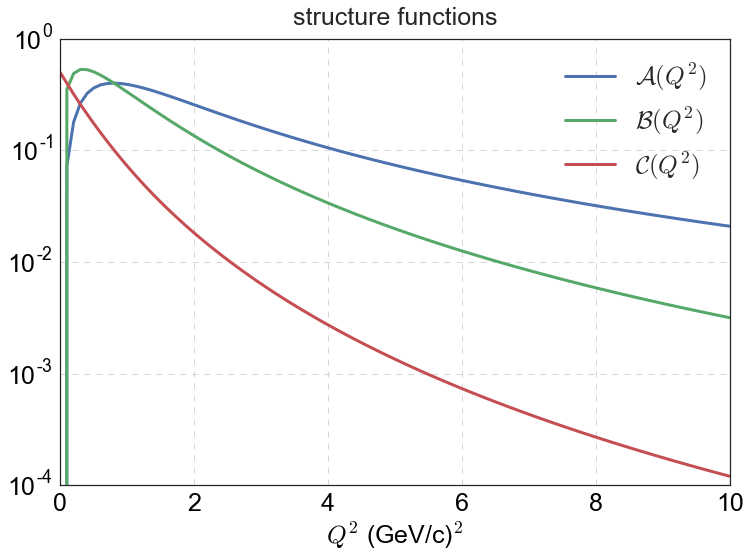

In [595]:
fig,ax=plt.subplots(figsize=(12,8))

plt.plot( Q2 , A(Q2) , label='$\\mathcal{A}(Q^2)$', linewidth=3);
plt.plot( Q2 , B(Q2) , label='$\\mathcal{B}(Q^2)$', linewidth=3);
plt.plot( Q2 , C(Q2) , label='$\\mathcal{C}(Q^2)$', linewidth=3);

plt.legend( loc='best', fontsize=25 )
set_axes(ax,Q2label,title='structure functions',do_add_grid=True)
ax.set_yscale('log')
plt.savefig(figures_path+'A_B_C.pdf')

# the cross-section

In [597]:
Q2 = np.linspace( 0.0 , 3 , 200 )

In [598]:
def CCelasticXsec(E=0,Q2=0.0):
    return (KinFactor(E , Q2) * ( A(Q2) + xi(E,Q2)*B(Q2) + np.square(xi(E,Q2))*C(Q2) ))

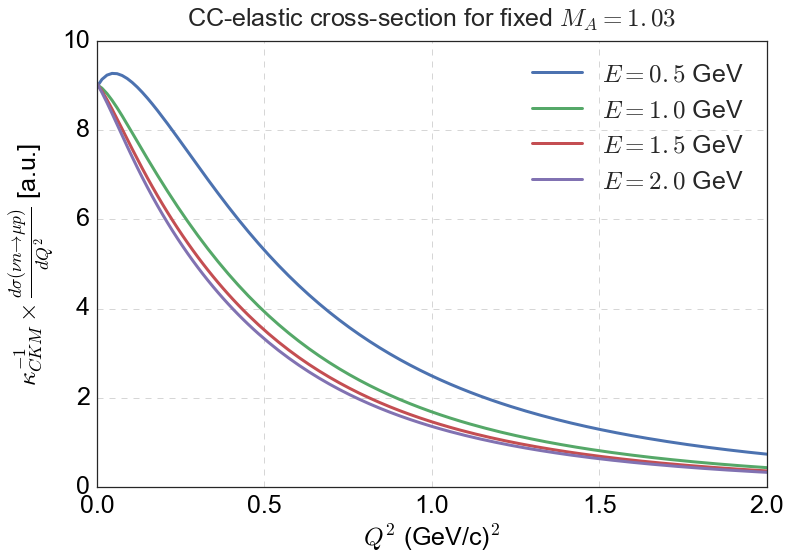

In [599]:
M_A = 1.03
fig,ax=plt.subplots(figsize=(12,8))
for E in np.linspace(0.5,2.0,4):
    plt.plot( Q2 , CCelasticXsec(E=E,Q2=Q2) , label='$E=%.1f$ GeV'%E , linewidth=3)
plt.legend( loc='upper right', fontsize=25 )
set_axes(ax,Q2label,'$\\kappa_{CKM}^{-1}\\times\\frac{d\\sigma (\\nu n \\to \\mu p) }{dQ^2} $ [a.u.]'
         ,title='CC-elastic cross-section for fixed $M_A=%.2f$'%M_A,do_add_grid=True)
# ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(0,2);
plt.savefig(figures_path+'CCelasticXsec_MA103_different_E.pdf')

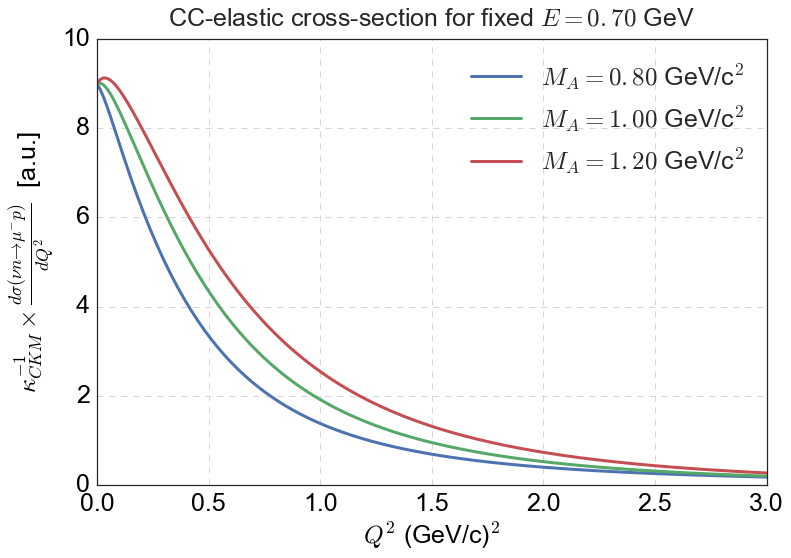

In [601]:
E = 0.7
fig,ax=plt.subplots(figsize=(12,8))
for axial_mass in np.linspace(0.8,1.2,3):
    M_A = axial_mass
    plt.plot( Q2 , CCelasticXsec(E=E,Q2=Q2) , label='$M_A=%.2f$ GeV/c$^2$'%M_A,linewidth=3)
plt.legend( loc='upper right', fontsize=25 )
set_axes(ax,Q2label,'$\\kappa_{CKM}^{-1}\\times\\frac{d\\sigma (\\nu n \\to \\mu^{-} p) }{dQ^2} $  [a.u.]'
         ,title='CC-elastic cross-section for fixed $E=%.2f$ GeV'%E,do_add_grid=True)
plt.savefig(figures_path+'CCelasticXsec_E700_different_MA.pdf')